In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.03287905 0.09951298 0.85487679 ... 0.77025454 0.73311184 0.79304353]
 [0.03460236 0.10472879 0.89968373 ... 0.81062614 0.77153667 0.83460958]
 [0.00735503 0.02226103 0.19123569 ... 0.17230572 0.16399691 0.17740361]
 ...
 [0.00209356 0.00633645 0.05443398 ... 0.04904569 0.04668064 0.05049677]
 [0.0231468  0.07005698 0.60183192 ... 0.54225799 0.51610959 0.5583014 ]
 [0.0181735  0.05500461 0.47252294 ... 0.425749   0.40521882 0.43834534]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.09659731  0.16126002  1.03319978 ...  0.69060647  0.69291125
   0.80591733]
 [ 0.09569289  0.00144066  0.84624772 ...  0.83310462  0.59796931
   0.80684693]
 [-0.11306949 -0.20900795  0.27567852 ...  0.14188585 -0.02192126
   0.14896998]
 ...
 [ 0.07722443 -0.23456693  0.15728369 ... -0.00912067  0.06084125
   0.00529739]
 [-0.00432988 -0.00988655  0.61402243 ...  0.50980871  0.52724863
   0.3682833 ]
 [-0.11229734 -0.01652181  0.65659479 ...  0.43468971  0.46737678
   0.56

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_exp",
                prior_L="point_exp") 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.0821,  0.1021,  0.2426, -0.0306,  0.1556, -0.0653, -0.2286, -0.1846,
         0.2587, -0.1165,  0.3030, -0.4677,  0.0117, -0.1023,  0.2962,  0.1676,
        -0.0810,  0.3109, -0.1018, -0.0285, -0.0170,  0.0564, -0.0216,  0.0090,
        -0.2323, -0.0983, -0.2755, -0.1445, -0.0160,  0.1154,  0.2898,  0.1490,
         0.0284,  0.0606, -0.2105,  0.0567, -0.1254,  0.2715, -0.2954, -0.2082,
        -0.0759, -0.2389, -0.2892,  0.1123,  0.1555,  0.0669,  0.2876,  0.0795,
         0.1079, -0.0178])
tensor([ 0.1246, -0.2577,  0.1236, -0.1114,  0.1041, -0.2140,  0.1477, -0.2542,
        -0.0866,  0.0641, -0.1317,  0.1659,  0.0923,  0.0454,  0.0950, -0.1270,
         0.0211,  0.1260,  0.1193,  0.0509,  0.2942,  0.3134,  0.0944,  0.0248,
        -0.0288,  0.0937, -0.2073,  0.1144, -0.1190, -0.0543, -0.3972, -0.0190,
        -0.1498,  0.0385,  0.0944,  0.2285, -0.1722, -0.0046, -0.2376,  0.1247])


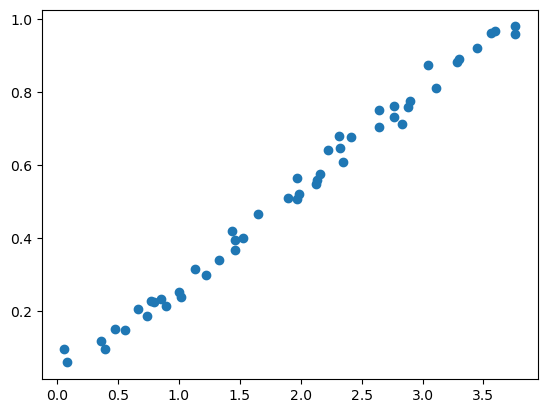

In [6]:
plt.scatter( mycebmf.L[:,0],u)

In [7]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor(238.5976)
tensor(0.5968)
tensor(0.6675)
tensor(0.3649)
tensor(0.4798)


tensor([[0.0490, 0.0932, 0.8629,  ..., 0.7459, 0.7218, 0.8019],
        [0.0515, 0.0973, 0.9020,  ..., 0.7786, 0.7534, 0.8372],
        [0.0159, 0.0189, 0.1808,  ..., 0.1490, 0.1404, 0.1607],
        ...,
        [0.0033, 0.0034, 0.0340,  ..., 0.0246, 0.0249, 0.0268],
        [0.0349, 0.0629, 0.5814,  ..., 0.5035, 0.4906, 0.5408],
        [0.0271, 0.0516, 0.4792,  ..., 0.4103, 0.3977, 0.4415]])

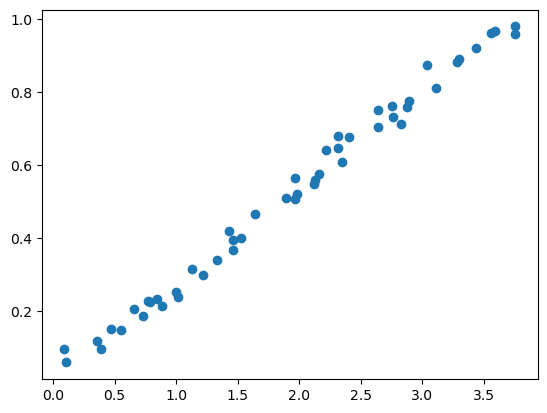

In [8]:
plt.scatter( mycebmf.L[:,0],u)

tensor(234.7763)
tensor(0.1484)
tensor(0.8584)
tensor(0.0234)
tensor(0.0189)


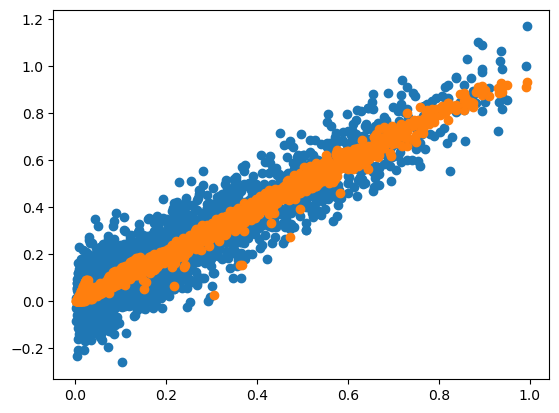

In [9]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
mycebmf.fit()

tensor(238.5976)
tensor(0.5968)
tensor(0.6675)
tensor(0.3649)
tensor(0.4798)
tensor(234.7763)
tensor(0.1484)
tensor(0.8584)
tensor(0.0234)
tensor(0.0189)
tensor(235.3468)
tensor(0.0950)
tensor(0.8986)
tensor(0.0243)
tensor(0.0193)
tensor(235.6747)
tensor(0.0343)
tensor(0.9249)
tensor(0.0229)
tensor(0.0207)
tensor(236.0532)
tensor(0.0292)
tensor(0.9439)
tensor(0.0201)
tensor(0.0200)
tensor(236.2454)
tensor(0.0121)
tensor(0.9541)
tensor(0.0101)
tensor(0.0284)
tensor(236.3710)
tensor(0.0173)
tensor(0.9626)
tensor(0.0156)
tensor(0.0302)
tensor(236.5428)
tensor(0.0161)
tensor(0.9687)
tensor(0.0237)
tensor(0.0246)
tensor(236.7038)
tensor(0.0225)
tensor(0.9721)
tensor(0.0163)
tensor(0.0368)
tensor(236.7490)
tensor(0.0285)
tensor(0.9735)
tensor(0.0106)
tensor(0.0148)
tensor(236.6213)
tensor(0.0203)
tensor(0.9764)
tensor(0.0186)
tensor(0.0100)
tensor(236.5769)
tensor(0.0103)
tensor(0.9758)
tensor(0.0179)
tensor(0.0112)
tensor(236.5873)
tensor(0.0125)
tensor(0.9767)
tensor(0.0192)
tensor(0.0100)

CEBMFResult(L=tensor([[3.4274, 0.0234, 0.0793, 0.0174, 0.0184],
        [3.5708, 0.0233, 0.2167, 0.0173, 0.0184],
        [0.6534, 0.0235, 0.0095, 0.0175, 0.0185],
        [2.8672, 0.0232, 0.0103, 0.0172, 0.0183],
        [1.5161, 0.0236, 0.0205, 0.0175, 0.0186],
        [2.8830, 0.0237, 0.0347, 0.0176, 0.0187],
        [1.9573, 0.0234, 0.0127, 0.0174, 0.0185],
        [0.4619, 0.0238, 0.0144, 0.0177, 0.0187],
        [0.9870, 0.0236, 0.3734, 0.0175, 0.0186],
        [0.9928, 0.0233, 0.0235, 0.0173, 0.0184],
        [0.7787, 0.0243, 0.0557, 0.0181, 0.0191],
        [1.2092, 0.0236, 0.0218, 0.0175, 0.0186],
        [0.0896, 0.0237, 0.3650, 0.0176, 0.0186],
        [2.7528, 0.0235, 0.0291, 0.0175, 0.0185],
        [1.9696, 0.0232, 0.0697, 0.0172, 0.0183],
        [1.4543, 0.0236, 0.0095, 0.0175, 0.0186],
        [1.4491, 0.0240, 0.0359, 0.0178, 0.0189],
        [1.6383, 0.0232, 0.0060, 0.0172, 0.0183],
        [1.4189, 0.0236, 0.0619, 0.0175, 0.0186],
        [2.2102, 0.0233, 0.0243, 0.0

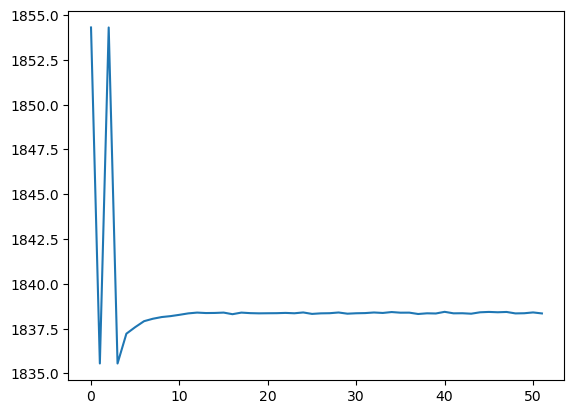

In [11]:
plt.plot(mycebmf.obj)

tensor(0.0008, dtype=torch.float64)

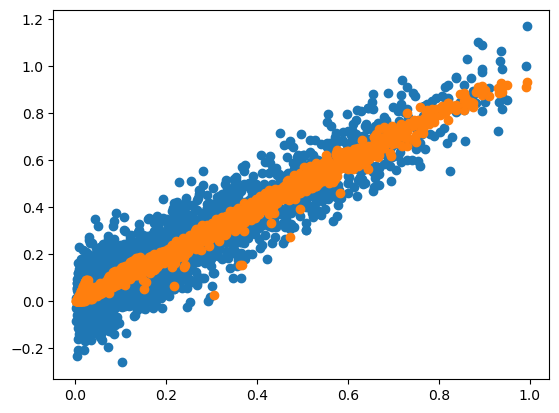

In [12]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [13]:
results =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix,prior_L="point_exp",
                    prior_F="point_exp") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

tensor(0.0050)
tensor(0.2149)
tensor(0.6171)
tensor(0.3932)
tensor(0.3434)
tensor(3785.9331)
tensor(0.0787)
tensor(0.2451)
tensor(0.3127)
tensor(0.1685)
tensor(3496.0310)
tensor(0.0406)
tensor(0.1329)
tensor(0.2525)
tensor(0.0770)
tensor(3824.6479)
tensor(0.0294)
tensor(0.0934)
tensor(0.2619)
tensor(0.0475)
tensor(4093.3276)
tensor(0.0239)
tensor(0.0482)
tensor(0.2919)
tensor(0.0358)
tensor(4316.6499)
tensor(0.0195)
tensor(0.0202)
tensor(0.3199)
tensor(0.0285)
tensor(4509.9829)
tensor(0.0159)
tensor(0.0095)
tensor(0.3380)
tensor(0.0227)
tensor(4685.5400)
tensor(0.0127)
tensor(0.0093)
tensor(0.3499)
tensor(0.0176)
tensor(4846.3306)
tensor(0.0099)
tensor(0.0096)
tensor(0.3589)
tensor(0.0118)
tensor(5002.0938)
tensor(0.0079)
tensor(0.0098)
tensor(0.3665)
tensor(0.0090)
tensor(5156.1284)
tensor(0.0062)
tensor(0.0099)
tensor(0.3741)
tensor(0.0066)
tensor(5327.8306)
tensor(0.0045)
tensor(0.0119)
tensor(0.3821)
tensor(3.4888e-05)
tensor(5505.3691)
tensor(0.0029)
tensor(0.0099)
tensor(0.3883)


KeyboardInterrupt: 

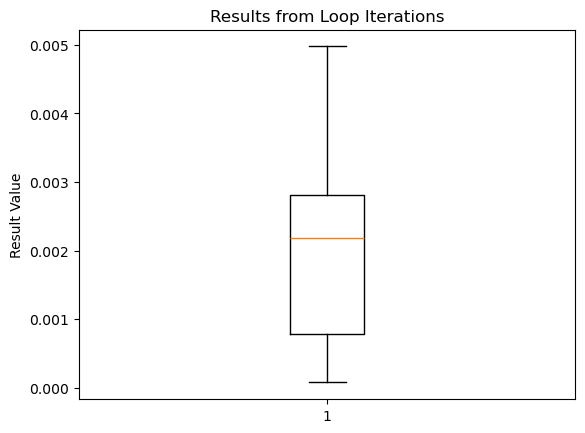

In [14]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [15]:
res= np.asarray(results)
np.mean(res )

0.001959184292365464